In [1]:
from torchvision import transforms as T
from pathlib import Path
from PIL import Image
import torch
from torch.utils.data import Dataset
import os
import json
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [2]:
# ------------  CONFIG  -------------------
base_path = '/scratch/cv-course-group-5/data/dataset_jpg'
dst_root   = Path(base_path + '/preprocessed_dataset')
anno_file  = Path(base_path + '/dataset/annotations.json')

In [3]:
# Path to your JSON file
json_path = Path(base_path + '/mean_std.json')

# Load the file
with open(json_path, 'r') as f:
    mean_std_json = json.load(f)

mean = mean_std_json.get("mean", [])
std = mean_std_json.get("std", [])

In [4]:
# Path to your JSON file
json_path = Path(base_path + '/train_test_split.json')

# Load the file
with open(json_path, 'r') as f:
    split_data = json.load(f)

# Access the train and test entries
train_list = split_data.get("train", [])
train_list

[{'id': 1, 'name': 1},
 {'id': 3, 'name': 3},
 {'id': 4, 'name': 4},
 {'id': 5, 'name': 5},
 {'id': 6, 'name': 6},
 {'id': 8, 'name': 8},
 {'id': 9, 'name': 9},
 {'id': 10, 'name': 10},
 {'id': 11, 'name': 11},
 {'id': 12, 'name': 12},
 {'id': 14, 'name': 14},
 {'id': 19, 'name': 19},
 {'id': 20, 'name': 20},
 {'id': 21, 'name': 21},
 {'id': 22, 'name': 22},
 {'id': 23, 'name': 23},
 {'id': 25, 'name': 25},
 {'id': 26, 'name': 26},
 {'id': 30, 'name': 30},
 {'id': 34, 'name': 34},
 {'id': 35, 'name': 35},
 {'id': 36, 'name': 36},
 {'id': 37, 'name': 37},
 {'id': 38, 'name': 38},
 {'id': 40, 'name': 40},
 {'id': 42, 'name': 42},
 {'id': 43, 'name': 43},
 {'id': 44, 'name': 44},
 {'id': 48, 'name': 48},
 {'id': 49, 'name': 49},
 {'id': 50, 'name': 50},
 {'id': 51, 'name': 51},
 {'id': 53, 'name': 54},
 {'id': 55, 'name': 56},
 {'id': 56, 'name': 57},
 {'id': 57, 'name': 58},
 {'id': 60, 'name': 62},
 {'id': 61, 'name': 63},
 {'id': 62, 'name': 64},
 {'id': 63, 'name': 65},
 {'id': 65, 'n

In [5]:
augmentations = T.Compose([
    T.RandomHorizontalFlip(p=0.5),      # flip left-right with 50% probability
    T.RandomVerticalFlip(p=0.5),        # flip top-bottom with 50% probability
    T.RandomRotation(degrees=10),       # rotate randomly between -10° and +10°
    T.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),  # slight blur
    T.ToTensor(),
    T.Normalize(mean= mean,
                std=std),
])

In [6]:
class CellDataset(Dataset):
    def __init__(self, video_list, path_to_videos, transform=None):
        self.image_paths = []
        self.path_to_videos = path_to_videos
        self.transform = transform

        for video_dict in video_list:
            dst_path = path_to_videos / str(video_dict['name']) / 'images'
            self.image_paths += dst_path.glob('*.jpg')

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        img = Image.open(img_path).convert("RGB")

        if self.transform:
            view1 = self.transform(img)
            view2 = self.transform(img)
            return view1, view2

        return img

In [7]:
transform = transforms.ToTensor()
dataset1 = CellDataset(video_list=train_list, path_to_videos=dst_root)
dataset = CellDataset(video_list=train_list, path_to_videos=dst_root, transform=augmentations)
loader = DataLoader(dataset, batch_size=32, shuffle=False)

In [8]:
import matplotlib.pyplot as plt

In [16]:
i = 300

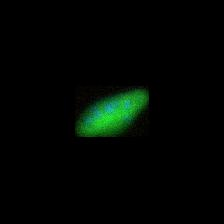

In [17]:
dataset1[i]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.23600417..38.297405].


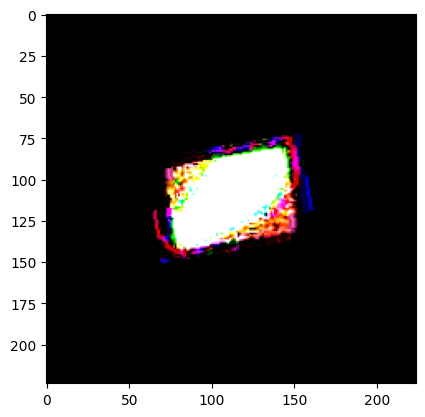

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.23600417..37.56176].


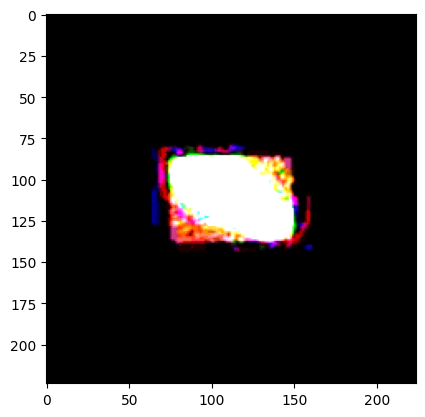

In [18]:
img = dataset[i][0].permute(1, 2, 0)
plt.imshow(img)
plt.show()

img = dataset[i][1].permute(1, 2, 0)
plt.imshow(img)
plt.show()

In [21]:
dataset[0][0].shape

torch.Size([3, 224, 224])